# Basics with Time Series Financial Data

In [3]:
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas_datareader.data as web
import quandl

## Getting Data

### Static Data

In [16]:
datadict = {
    'Date': ['2019-01-01', '2019-02-01', '2019-03-01'],
    'Open': [1.00, 2.00, 3.00],
    'High': [1.00, 2.00, 3.00],
    'Low': [1.00, 2.00, 3.00],
    'Close': [1.00, 2.00, 3.00],
    'Volume': [1e6, 2e6, 3e6],
}

df = pd.DataFrame(datadict, index=datadict['Date'])
df.drop('Date', axis=1, inplace=True)
df.head()

## Alt Method
df = pd.DataFrame(datadict)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', drop=True, inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-01,1.0,1.0,1.0,1.0,1000000.0
2019-02-01,2.0,2.0,2.0,2.0,2000000.0
2019-03-01,3.0,3.0,3.0,3.0,3000000.0


### Pandas Datareader

In [19]:
fb = web.DataReader(name='VXX', data_source='yahoo', start='2012-01-01', end=None)  # end defaults to today
fb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-25,27.660000,27.660000,27.660000,27.660000,0,27.660000
2018-01-26,27.660000,27.660000,27.660000,27.660000,0,27.660000
2018-01-29,29.580000,29.200001,29.200001,29.580000,1400,29.580000
2018-01-30,31.809999,30.490000,30.790001,30.549999,63300,30.549999
2018-01-31,30.680000,29.959999,29.959999,30.650000,9200,30.650000


### Quandl

In [23]:
oil = quandl.get(dataset='EIA/PET_RWTC_D')  # from quandl website
oil.tail()

,Value
Date,
2019-10-09,52.63
2019-10-10,53.57
2019-10-11,54.76
2019-10-14,53.57
2019-10-15,52.81


See more dataset symbols at: https://www.quandl.com/search?filters=%5B%22Free%22%5D

## Pandas Time Series Operations

### Resampling

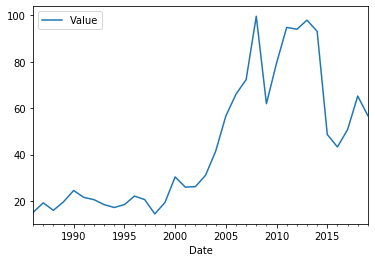

In [32]:
oil.resample(rule='A').mean().plot();

^By start of year

More rules at: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

### Time Shifts

In [31]:
print('Forward Shift Prices')
print(oil.shift(periods=1).head())
print('\nBack Shift Prices')
print(oil.shift(periods=-1).tail())

Forward Shift Prices
            Value
Date             
1986-01-02    NaN
1986-01-03  25.56
1986-01-06  26.00
1986-01-07  26.53
1986-01-08  25.85

Back Shift Prices
            Value
Date             
2019-10-09  53.57
2019-10-10  54.76
2019-10-11  53.57
2019-10-14  52.81
2019-10-15    NaN


### Moving Averages

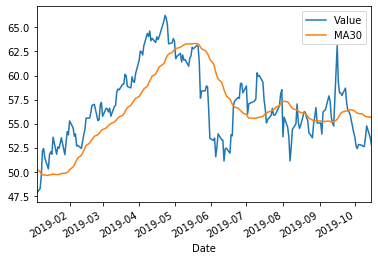

In [46]:
oil['MA30'] = oil['Value'].rolling(window=30, min_periods=1).mean()    # this does expanding mean first up till 30 days
oil[['Value', 'MA30']].tail(200).plot();

### Bollinger Bands
Made up of:
1. $MA_{20}$
2. $Upper = MA_{20} + 2 * std_{20}$
3. $Lower = MA_{20} - 2 * std_{20}$
4. $Price$

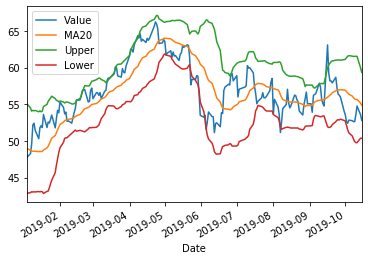

In [44]:
oil['MA20'] = oil['Value'].rolling(window=20, min_periods=1).mean()
oil['Upper'] = oil['MA20'] + 2 * oil['Value'].rolling(window=20, min_periods=1).std()
oil['Lower'] = oil['MA20'] - 2 * oil['Value'].rolling(window=20, min_periods=1).std()
oil[['Value', 'MA20', 'Upper', 'Lower']].tail(200).plot();

### Daily Returns => $ r_{t} = \frac{p_{t}}{p_{t-1}} - 1 $
### Cumulative Returns => $ p_{t} = (1 + r_{t}) * p_{t-1} $

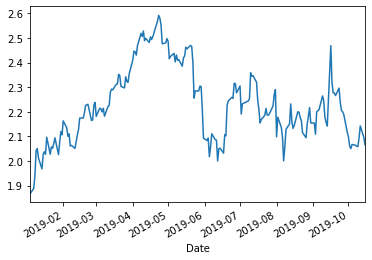

In [50]:
oil['Daily Returns'] = oil['Value'].pct_change(periods=1)
oil['Cumulative Returns'] = (1 + oil['Daily Returns']).cumprod()
oil['Cumulative Returns'].tail(200).plot();